In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [12]:
def ff(x, omega,alpha):
    # return omega
    # If you just return ff=omega, this gives the usual Classifier free guidance, the same as the one
    # called 'linear' in the calc_score function
    # return omega/(x**.75+1.e-6)

    return omega/(x**(-alpha)+1.e-6)


def calc_score(itau, dt, itfms, omega, q, alpha, lin=False):
    expt = np.exp(-dt*(itfms-itau))
    linear = expt*(1+omega-omega*np.tanh(q*expt))
    nonlinear = expt*(1+(1 - np.tanh(q*expt)) *
                      ff(expt*(1-np.tanh(q*expt)), omega, alpha))
    normdiff = expt*(1-np.tanh(q*expt))  # Norm of S_full-S_class
    if lin:
        return linear, normdiff
    else:
        return nonlinear, normdiff


def init_backward():
    return np.random.normal(0, 1)


def calc_traj_back_exact(qinit, nt, dt, itfms, omega, alpha,lin=False):
    qback = np.zeros(nt)
    time = np.zeros(nt)
    normd = np.zeros(nt)
    qback[0] = qinit
    q = qback[0]
    time[0] = 0
    for it in np.arange(nt-1):
        eta = np.random.normal(0, np.sqrt(2*dt))
        # rx=xback[it,:]
        sc, normdiff = calc_score(it, dt, itfms, omega, q, alpha, lin)
        q = (1-dt)*q+2*dt*sc+eta
        qback[it+1] = q
        time[it+1] = it*dt
        normd[it] = normdiff
    return time, qback,normd

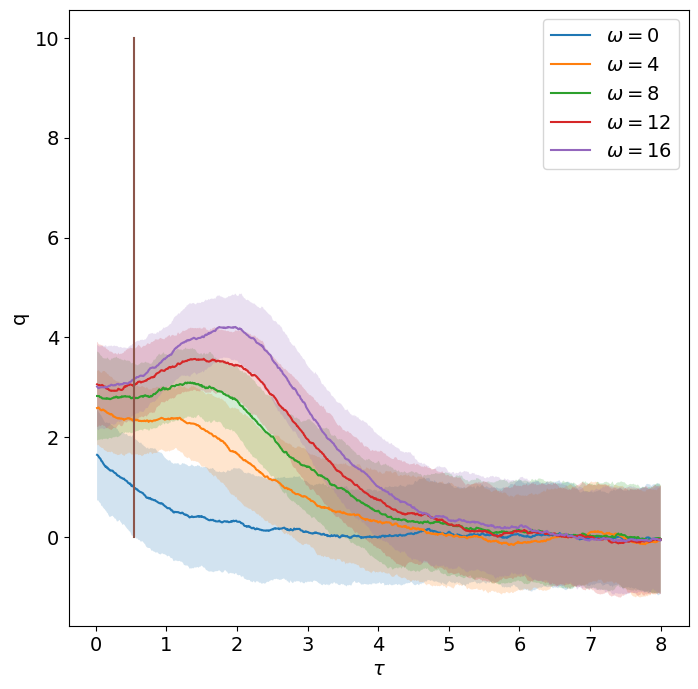

[1.64819974 2.58581604 2.82653863 3.06100499 3.01563667]
[0.91625624 0.75037244 0.89473769 0.85152519 0.83938218]


In [25]:
#Here we run three single trajectories just to have a look
qinit=init_backward()
dt=.01 # K: timesteps
nt=800 #final time is nt*dt
dim = 3
ns=int(0.5*np.log(dim)/dt) #speciation time is t_s=ns*dt=(1/2) log (d)
alpha = -0.75
itfms=nt-ns
nsample=200

nomega=5
omegag=np.zeros(nomega)
qtraj=np.zeros((nomega,nsample,nt))
normstat=np.zeros((nomega,nsample,nt))
for ijk in np.arange(nsample):
    qinit=init_backward()
    for iomega in np.arange(nomega):
        omega=8*iomega
        omegag[iomega]=omega
        time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega, alpha, lin=True)
        
for iomega in np.arange(nomega):
    qav = np.mean(qtraj, axis=1)
    qstd = np.std(qtraj, axis=1)
    plt.plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    plt.fill_between(nt*dt-time, qav[iomega,:]-qstd[iomega,:], qav[iomega,:]+qstd[iomega,:], alpha=0.2)
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,10])
plt.xlabel(r'$\tau$')
plt.ylabel('q')
plt.legend()
plt.show()

print(qav[:,-1])
print(qstd[:,-1])

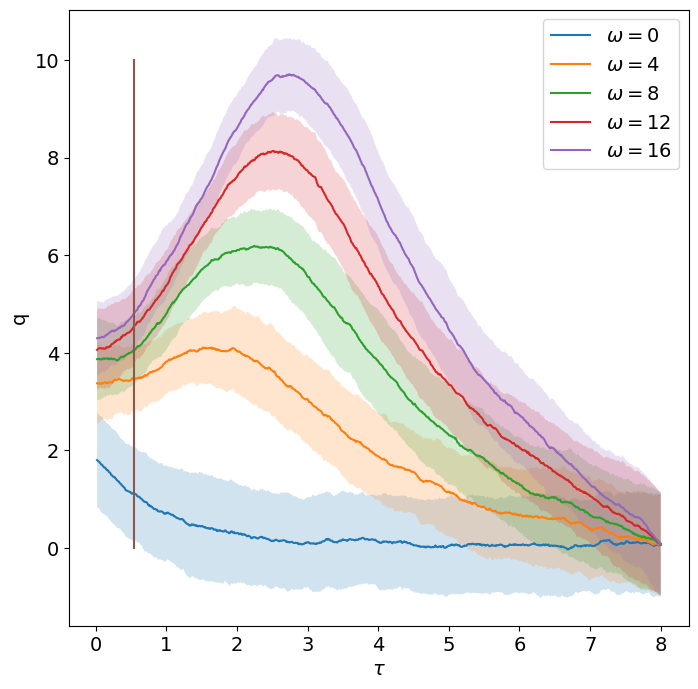

[1.8018846  3.3769325  3.87064146 4.06098055 4.29850749]
[0.9721247  0.84311751 0.83609604 0.83563279 0.76916329]


In [34]:
#Here we run three single trajectories just to have a look
qinit=init_backward()
dt=.01 # K: timesteps
nt=800 #final time is nt*dt
dim = 3
ns=int(0.5*np.log(dim)/dt) #speciation time is t_s=ns*dt=(1/2) log (d)
alpha = -0.5
itfms=nt-ns
nsample=200

nomega=5
omegag=np.zeros(nomega)
qtraj=np.zeros((nomega,nsample,nt))
normstat=np.zeros((nomega,nsample,nt))
for ijk in np.arange(nsample):
    qinit=init_backward()
    for iomega in np.arange(nomega):
        omega=8*iomega
        omegag[iomega]=omega
        time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega, alpha, lin=False)
        
for iomega in np.arange(nomega):
    qav = np.mean(qtraj, axis=1)
    qstd = np.std(qtraj, axis=1)
    plt.plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    plt.fill_between(nt*dt-time, qav[iomega,:]-qstd[iomega,:], qav[iomega,:]+qstd[iomega,:], alpha=0.2)
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,10])
plt.xlabel(r'$\tau$')
plt.ylabel('q')
plt.legend()
plt.show()

print(qav[:,-1])
print(qstd[:,-1])

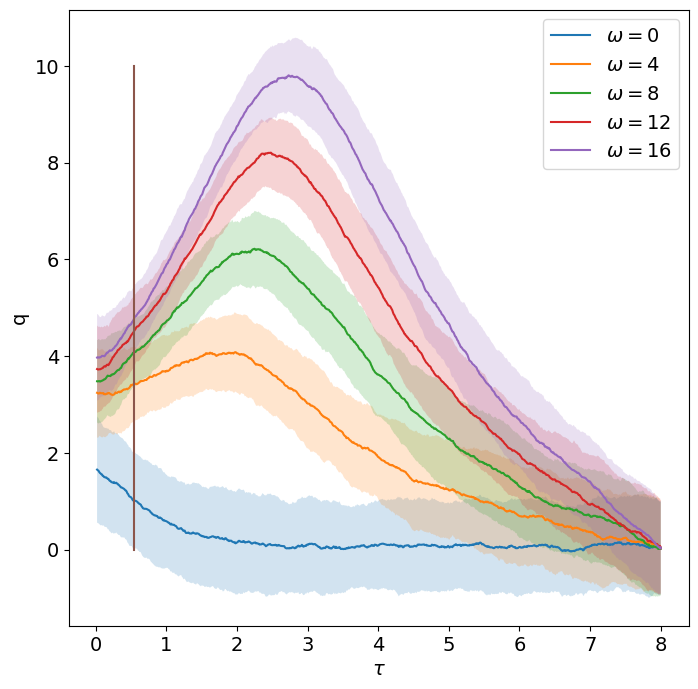

[1.65543608 3.24284759 3.48109264 3.73376865 3.97208051]
[1.0963596  0.92691879 0.85234873 0.90038293 0.89292778]


In [ ]:
#Here we run three single trajectories just to have a look
qinit=init_backward()
dt=.01 # K: timesteps
nt=800 #final time is nt*dt
dim = 3
ns=int(0.5*np.log(dim)/dt) #speciation time is t_s=ns*dt=(1/2) log (d)
alpha = -0.5
itfms=nt-ns
nsample=200

nomega=5
omegag=np.zeros(nomega)
qtraj=np.zeros((nomega,nsample,nt))
normstat=np.zeros((nomega,nsample,nt))
for ijk in np.arange(nsample):
    qinit=init_backward()
    for iomega in np.arange(nomega):
        omega=8*iomega
        omegag[iomega]=omega
        time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact_k(qinit,nt,dt,itfms,omega, alpha, lin=False)
        
for iomega in np.arange(nomega):
    qav = np.mean(qtraj, axis=1)
    qstd = np.std(qtraj, axis=1)
    plt.plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    plt.fill_between(nt*dt-time, qav[iomega,:]-qstd[iomega,:], qav[iomega,:]+qstd[iomega,:], alpha=0.2)
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,10])
plt.xlabel(r'$\tau$')
plt.ylabel('q')
plt.legend()
plt.show()

print(qav[:,-1])
print(qstd[:,-1])

0it [00:00, ?it/s]

4it [00:20,  5.16s/it]/tmp/ipykernel_1301124/4005996725.py:7: RuntimeWarning: divide by zero encountered in scalar power
  return omega/(x**(-alpha)+1.e-6)
7it [00:36,  5.21s/it]


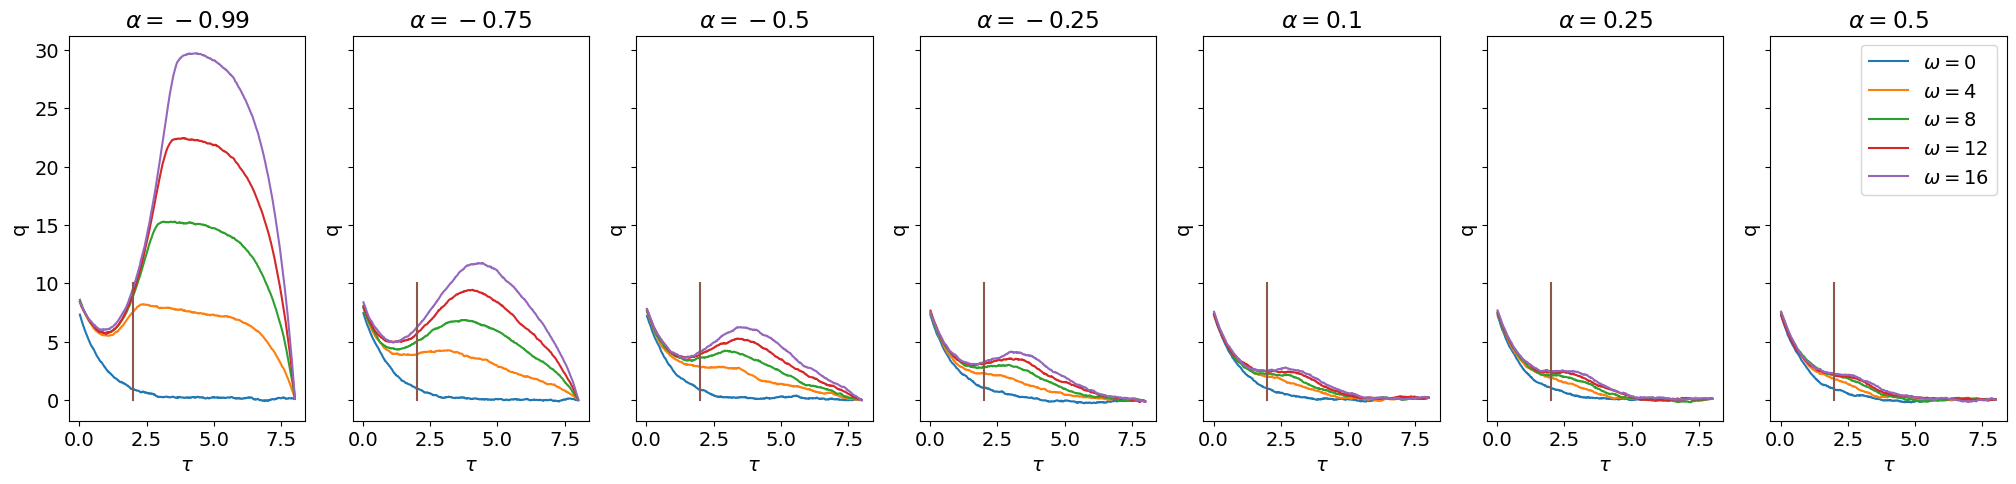

In [21]:
from tqdm import tqdm
alphas = [-0.99, -0.75, -0.5, -0.25, 0.1, 0.25, 0.5]
fig, ax = plt.subplots(1, len(alphas), sharex=True, sharey=True)
fig.set_size_inches(25, 5)
for i, alpha in tqdm(enumerate(alphas)):
    nomega=5
    omegag=np.zeros(nomega)
    qtraj=np.zeros((nomega,nsample,nt))
    normstat=np.zeros((nomega,nsample,nt))
    for ijk in np.arange(nsample):
        qinit=init_backward()
        for iomega in np.arange(nomega):
            omega=4*iomega
            omegag[iomega]=omega
            time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega, alpha)
    
    
    for iomega in np.arange(nomega):
        qav = np.mean(qtraj, axis=1)
        ax[i].plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    ax[i].plot([nt*dt-dt*itfms, nt*dt-dt*itfms], [0,10])
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('q')
    #ax[iomega].text(7,8,'$\omega=0$ to $16$')
    # ax[iomega].axis([0,12,-1,15])
    #ax[iomega].savefig('free-guidance-gaussian-mixture-q-backward_v3.pdf')
    ax[i].set_title(f'$\\alpha={alpha}$')
plt.legend()
plt.show()

omega= 0.0
omega= 4.0
omega= 8.0
omega= 12.0
omega= 16.0


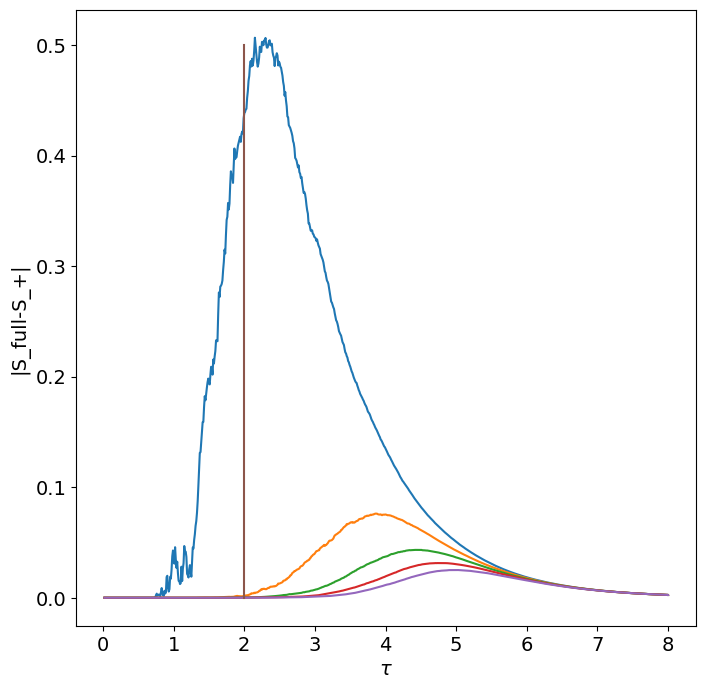

In [16]:
for iomega in np.arange(nomega):
    print('omega=',omegag[iomega])
    normav=np.mean(normstat,axis=1)
    plt.plot(nt*dt-time,normav[iomega,:])
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,.5])
plt.xlabel(r'$\tau$')
plt.ylabel('|S_full-S_+|')
#plt.text(7,8,'$\omega=0$ to $16$')
#plt.axis([0,12,-1,10])
#plt.savefig('free-guidance-gaussian-mixture-q-backward_v3.pdf')
plt.show()

# kruno new

In [31]:
def ff(x, omega,alpha):
    # return omega
    # If you just return ff=omega, this gives the usual Classifier free guidance, the same as the one
    # called 'linear' in the calc_score function
    # return omega/(x**.75+1.e-6)

    return omega/(x**(-alpha)+1.e-6)


def calc_score_k(itau, dt, itfms, omega, q, alpha):
    expt = np.exp(-dt*(itfms-itau))
    linear = expt*(1+omega-omega*np.tanh(q*expt))
    nonlinear = expt*(1+(1 - np.tanh(q*expt)) *
                      ff(expt*(1-np.tanh(q*expt)), omega, alpha))
    normdiff = expt*(1-np.tanh(q*expt))  # Norm of S_full-S_class
    return nonlinear, normdiff

def calc_new_score_k(itau, dt, itfms, omega, q, alpha):
    expt = np.exp(-dt*(itfms-itau))
    linear = expt*(1+omega-omega*np.tanh(q*expt))
    # nonlinear = expt*(1+(1 - np.tanh(q*expt)) *
                    #   ff(expt*(1-np.tanh(q*expt)), omega, alpha))
    normdiff = expt*(1-np.tanh(q*expt))  # Norm of S_full-S_class
    return linear, normdiff



def init_backward():
    return np.random.normal(0, 1)


def calc_traj_back_exact_k(qinit, nt, dt, itfms, omega, alpha):
    qback = np.zeros(nt)
    time = np.zeros(nt)
    normd = np.zeros(nt)
    qback[0] = qinit
    q = qback[0]
    time[0] = 0
    for it in np.arange(nt-1):
        eta = np.random.normal(0, np.sqrt(2*dt))
        # rx=xback[it,:]
        if it<itfms:
            sc, normdiff = calc_score_k(it, dt, itfms, omega, q, alpha)
        else:
            sc, normdiff = calc_new_score_k(it, dt, itfms, 0., q, alpha)
        q = (1-dt)*q+2*dt*sc+eta
        qback[it+1] = q
        time[it+1] = it*dt
        normd[it] = normdiff
    return time, qback,normd

In [32]:
#Run nsample trajectories 
nsample=100
dt=.01
nt=800 #final time is nt*dt
ns=200 #speciation time is t_s=ns*dt=(1/2) log (d)
itfms=nt-ns

4it [00:20,  5.15s/it]/tmp/ipykernel_1301124/1133115854.py:7: RuntimeWarning: divide by zero encountered in scalar power
  return omega/(x**(-alpha)+1.e-6)
7it [00:36,  5.21s/it]


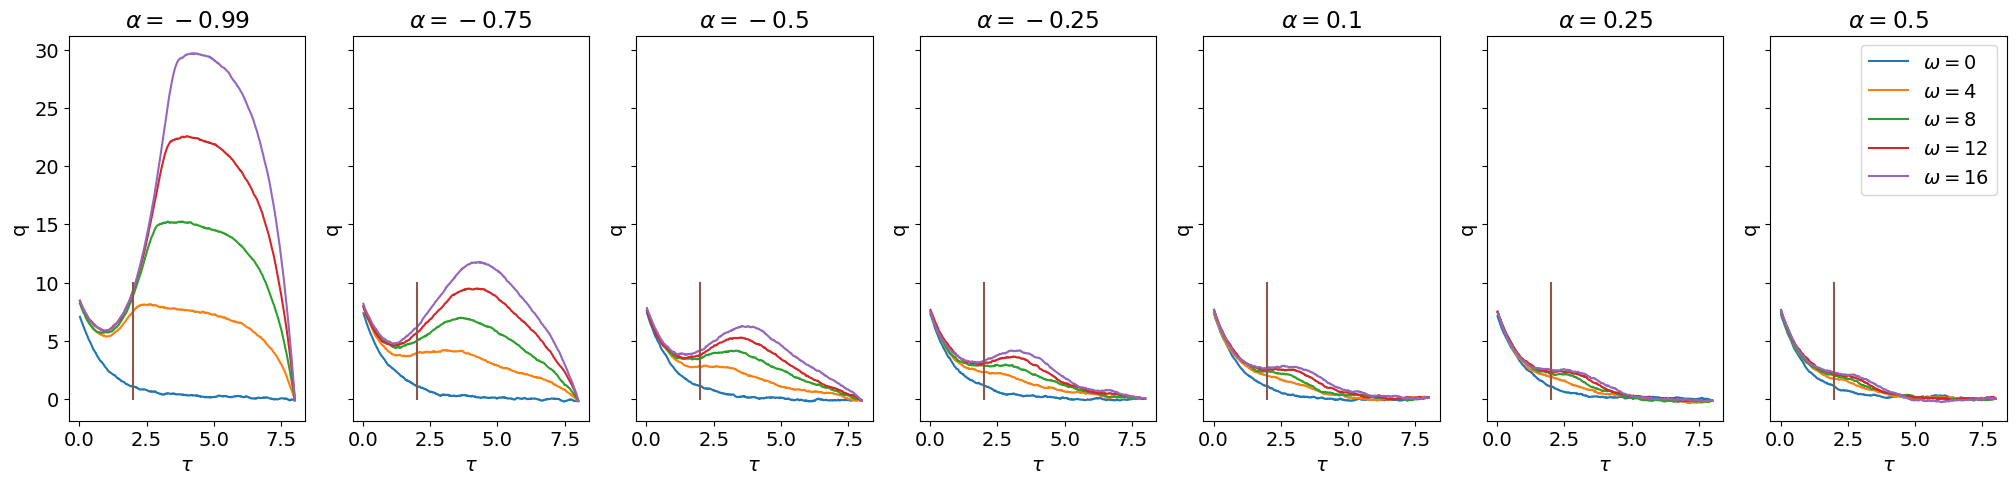

In [40]:
from tqdm import tqdm
alphas = [-0.99, -0.75, -0.5, -0.25, 0.1, 0.25, 0.5]
fig, ax = plt.subplots(1, len(alphas), sharex=True, sharey=True)
fig.set_size_inches(25, 5)
for i, alpha in tqdm(enumerate(alphas)):
    nomega=5
    omegag=np.zeros(nomega)
    qtraj=np.zeros((nomega,nsample,nt))
    normstat=np.zeros((nomega,nsample,nt))
    for ijk in np.arange(nsample):
        qinit=init_backward()
        for iomega in np.arange(nomega):
            omega=4*iomega
            omegag[iomega]=omega
            time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega, alpha)
    
    
    for iomega in np.arange(nomega):
        qav = np.mean(qtraj, axis=1)
        ax[i].plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    ax[i].plot([nt*dt-dt*itfms, nt*dt-dt*itfms], [0,10])
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('q')
    ax[i].set_title(f'$\\alpha={alpha}$')
plt.legend()
plt.show()

0it [00:00, ?it/s]

7it [00:34,  4.95s/it]


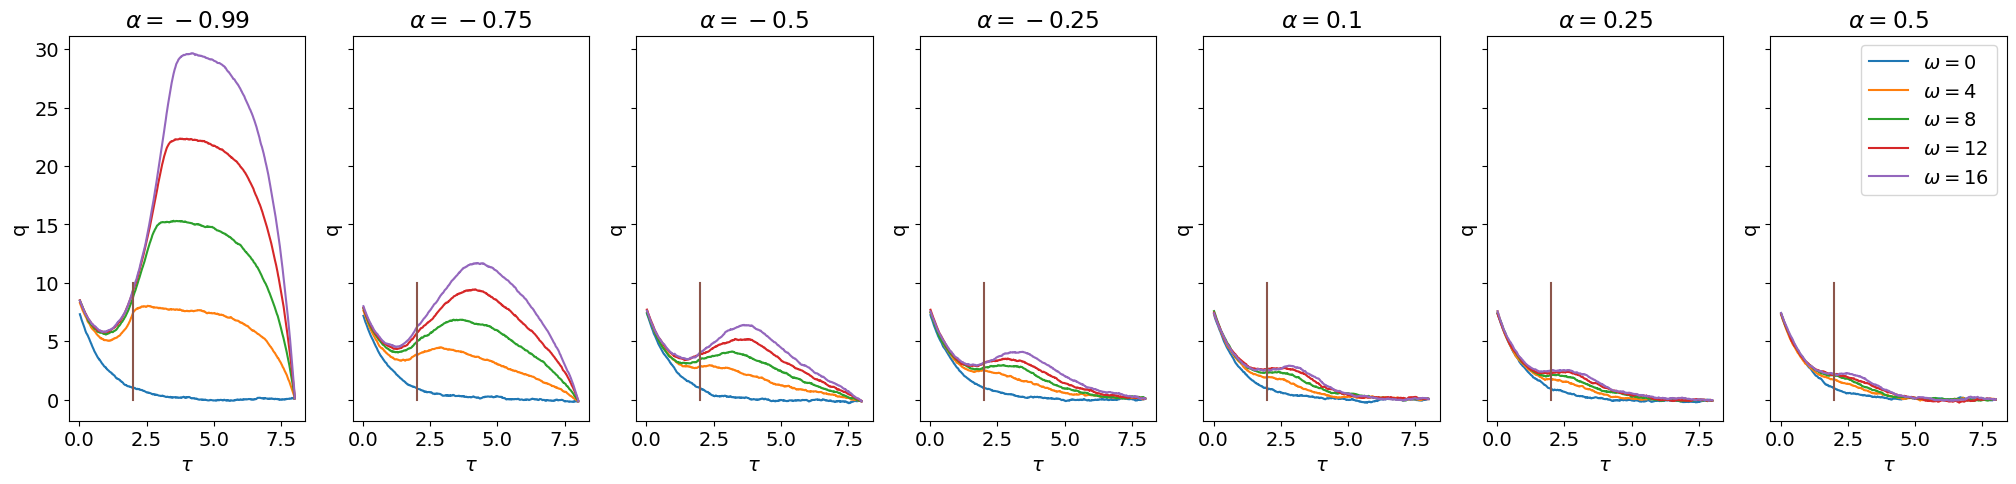

In [39]:
from tqdm import tqdm
alphas = [-0.99, -0.75, -0.5, -0.25, 0.1, 0.25, 0.5]
fig, ax = plt.subplots(1, len(alphas), sharex=True, sharey=True)
fig.set_size_inches(25, 5)
for i, alpha in tqdm(enumerate(alphas)):
    nomega=5
    omegag=np.zeros(nomega)
    qtraj=np.zeros((nomega,nsample,nt))
    normstat=np.zeros((nomega,nsample,nt))
    for ijk in np.arange(nsample):
        qinit=init_backward()
        for iomega in np.arange(nomega):
            omega=4*iomega
            omegag[iomega]=omega
            time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact_k(qinit,nt,dt,itfms,omega, alpha)
    
    
    for iomega in np.arange(nomega):
        qav = np.mean(qtraj, axis=1)
        ax[i].plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
    ax[i].plot([nt*dt-dt*itfms, nt*dt-dt*itfms], [0,10])
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('q')
    ax[i].set_title(f'$\\alpha={alpha}$')
plt.legend()
plt.show()

# STD

7it [00:34,  4.95s/it]


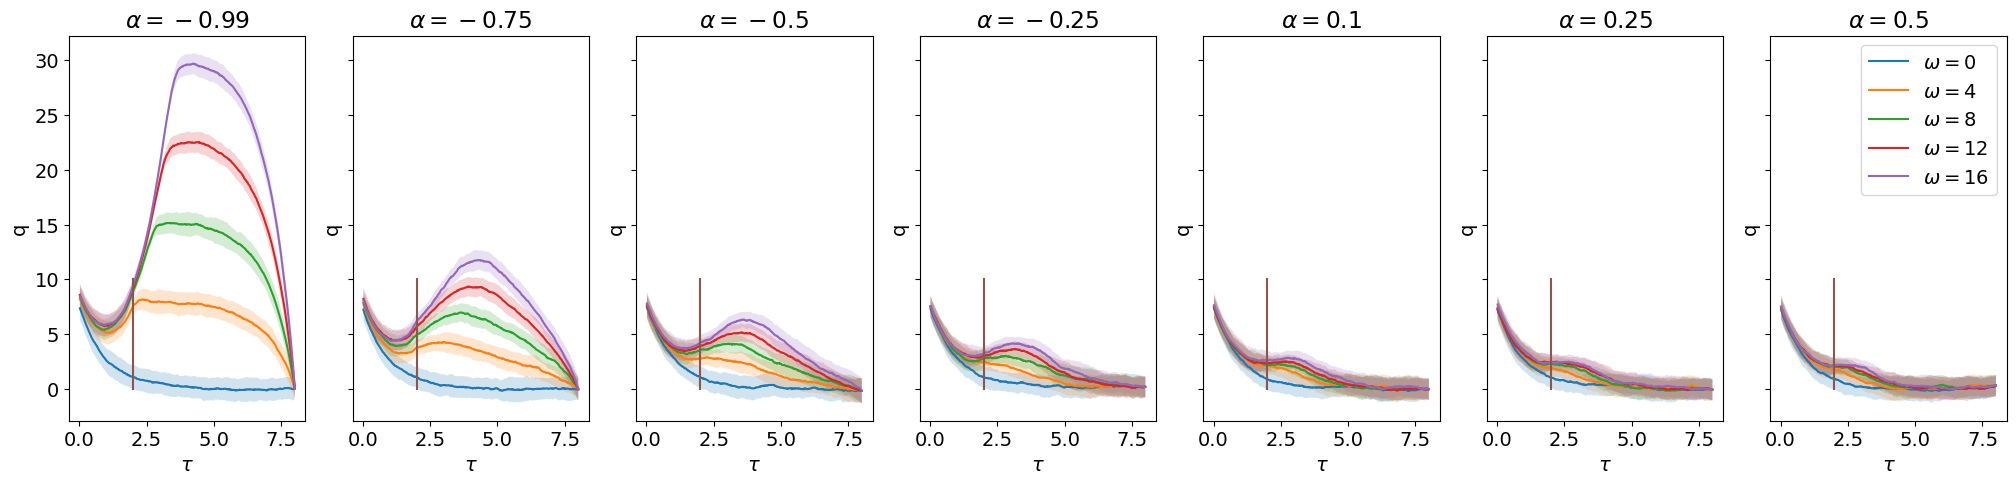

In [41]:

from tqdm import tqdm
alphas = [-0.99, -0.75, -0.5, -0.25, 0.1, 0.25, 0.5]
fig, ax = plt.subplots(1, len(alphas), sharex=True, sharey=True)
fig.set_size_inches(25, 5)
for i, alpha in tqdm(enumerate(alphas)):
    nomega=5
    omegag=np.zeros(nomega)
    qtraj=np.zeros((nomega,nsample,nt))
    normstat=np.zeros((nomega,nsample,nt))
    for ijk in np.arange(nsample):
        qinit=init_backward()
        for iomega in np.arange(nomega):
            omega=4*iomega
            omegag[iomega]=omega
            time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact_k(qinit,nt,dt,itfms,omega, alpha)
    
    
    for iomega in np.arange(nomega):
        qav = np.mean(qtraj, axis=1)
        qstd = np.std(qtraj, axis=1)
        ax[i].plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
        ax[i].fill_between(nt*dt-time, qav[iomega,:]-qstd[iomega,:], qav[iomega,:]+qstd[iomega,:], alpha=0.2)
    ax[i].plot([nt*dt-dt*itfms, nt*dt-dt*itfms], [0,10])
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('q')
    ax[i].set_title(f'$\\alpha={alpha}$')
plt.legend()
plt.show()

In [ ]:

from tqdm import tqdm
alphas = [-0.99]
fig, ax = plt.subplots(1, len(alphas), sharex=True, sharey=True)
fig.set_size_inches(25, 5)
for i, alpha in tqdm(enumerate(alphas)):
    nomega=5
    omegag=np.zeros(nomega)
    qtraj=np.zeros((nomega,nsample,nt))
    normstat=np.zeros((nomega,nsample,nt))
    for ijk in np.arange(nsample):
        qinit=init_backward()
        for iomega in np.arange(nomega):
            omega=4*iomega
            omegag[iomega]=omega
            time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact_k(qinit,nt,dt,itfms,omega, alpha)
    
    
    for iomega in np.arange(nomega):
        qav = np.mean(qtraj, axis=1)
        qstd = np.std(qtraj, axis=1)
        print(qstd)
        print(asd)
        ax[i].plot(nt*dt-time, qav[iomega,:], label=f'$\omega={4*iomega}$')
        ax[i].fill_between(nt*dt-time, qav[iomega,:]-qstd[iomega,:], qav[iomega,:]+qstd[iomega,:], alpha=0.2)
    ax[i].plot([nt*dt-dt*itfms, nt*dt-dt*itfms], [0,10])
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('q')
    ax[i].set_title(f'$\\alpha={alpha}$')
plt.legend()
plt.show()

In [50]:
print(qav[:,-1])
print(qstd[:,-1])

[7.21577711 8.18356929 8.40209617 8.53268039 8.44845635]
[1.07448819 1.04155725 1.01890873 1.01986309 0.91598198]


In [51]:
nomega=5
omegag=np.zeros(nomega)
qtraj=np.zeros((nomega,nsample,nt))
normstat=np.zeros((nomega,nsample,nt))
for ijk in np.arange(nsample):
    qinit=init_backward()
    for iomega in np.arange(nomega):
        omega=4*iomega
        omegag[iomega]=omega
        time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega, alpha)


qav = np.mean(qtraj, axis=1)
qstd = np.std(qtraj, axis=1)


In [54]:
print(qav[:,-1])
print(qstd[:,-1])
print(4*np.arange(nomega))

[7.36343192 8.23450893 8.58786206 8.55114805 8.52084792]
[1.04272857 0.98882851 0.94409738 1.06638268 0.97536508]
[ 0  4  8 12 16]
